<div align="center">

  <h2>Laboratório de Matemática Computacional (LaMaC)</h2>

  <h3>Tutorial de Morfologia Matemática</h3>

  Neste tutorial veremos o que é Morfologia Matemática, como aplicá-la em imagens digitais e como implementar suas operações.

</div>

---

### O que é Morfologia Matemática?

A morfologia matemática é uma metodologia de análise de imagens que possibilita a construção de operadores descritivos de objetos, denominados de operadores morfológicos, nas imagens. Apesar de, inicialmente, ter sido formulada utilizando exclusivamente imagens binárias, posteriormente foi adaptada para o tratamento de imagens monocromáticas [1, 2].

#### Imagens como conjuntos

Consideramos uma imagem binária como um conjunto de coordenadas nas quais seu mapeamento na matriz da imagem tem o valor 1, e o fundo da imagem, que não se encontra no conjunto, tem o valor 0 na matriz. O conjunto que representa a imagem binária pode ser expresso pela equação:

$$\{(x,y)|f(x,y) = 1\}.$$

No nosso caso, para facilitar a manipulação das imagens, o acesso aos seus índices e tornar as operações mais eficientes, podemos trabalhar com imagens booleanas, isto é, o objeto de interesse da imagem tem o valor `True` e o fundo `False`.

Veja a imagem em preto e branco a seguir:

<div align="center">

<img src="images/img.jpg" alt="Binary Image Example" style="width: 250px" />

</div>

Vamos carregar esta imagem e torná-la binária.

In [180]:
import numpy as np
import matplotlib.image as mpimg

img = mpimg.imread('images/img.jpg') # Tem shape (164, 156, 3), (Linhas, Colunas, RGB)
img = np.mean(img, axis=2) # Tira a média dos 3 valores dos canais de cores, agora tem shape (164, 156)

limiar = 128 # Limiar para "binarizar" a imagem
img_binaria = img > limiar

print('Região no meio da imagem:')
print(img_binaria[80:84, 77:81])

Região no meio da imagem:
[[False False False False]
 [False  True  True False]
 [False  True  True False]
 [False False False False]]


Perceba que o objeto na imagem é preto, e o fundo branco, vamos inverter esses valores somente para manter o rigor matemático.

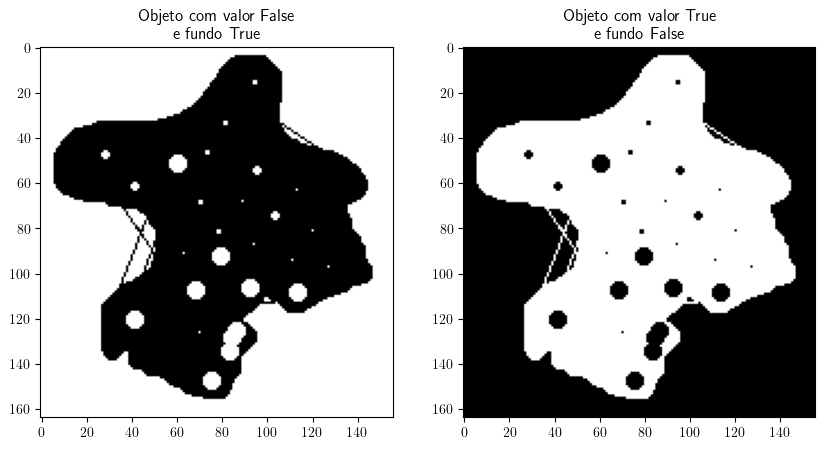

In [181]:
import matplotlib.pyplot as plt

img_bin = img_binaria.copy()
img_bin = img_binaria == False

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_binaria, cmap='gray')
ax[0].set_title('Objeto com valor False\ne fundo True')
ax[1].imshow(img_bin, cmap='gray')
ax[1].set_title('Objeto com valor True\ne fundo False')
plt.show()

#### Operações entre conjuntos

Como estamos considerando as imagens como conjuntos, podemos realizar operações entre as imagens da mesma forma que operamos em conjuntos.

Antes de começar a aplicar as operações, vamos dividir nossa imagem em 4 quadrantes:

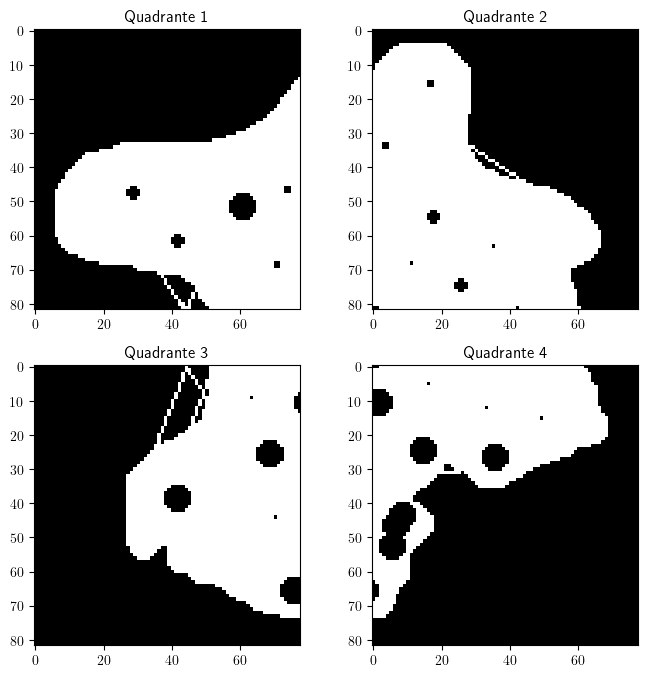

In [182]:
quadrante_1 = img_bin[0:img_bin.shape[0]//2, 0:img_bin.shape[1]//2]
quadrante_2 = img_bin[0:img_bin.shape[0]//2, img_bin.shape[1]//2:img_bin.shape[1]]
quadrante_3 = img_bin[img_bin.shape[0]//2:img_bin.shape[0], 0:img_bin.shape[1]//2]
quadrante_4 = img_bin[img_bin.shape[0]//2:img_bin.shape[0], img_bin.shape[1]//2:img_bin.shape[1]]

fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].imshow(quadrante_1, cmap='gray')
ax[0,0].set_title('Quadrante 1')
ax[0,1].imshow(quadrante_2, cmap='gray')
ax[0,1].set_title('Quadrante 2')
ax[1,0].imshow(quadrante_3, cmap='gray')
ax[1,0].set_title('Quadrante 3')
ax[1,1].imshow(quadrante_4, cmap='gray')
ax[1,1].set_title('Quadrante 4')
plt.show()

#### União

A união entre dois conjuntos, $A$ e $B$, é dada por:

$$A \cup B = \{c|c\in A \text{ ou } c \in B\}.$$

Vamos aplicar a união entre o primeiro e o segundo quadrante:

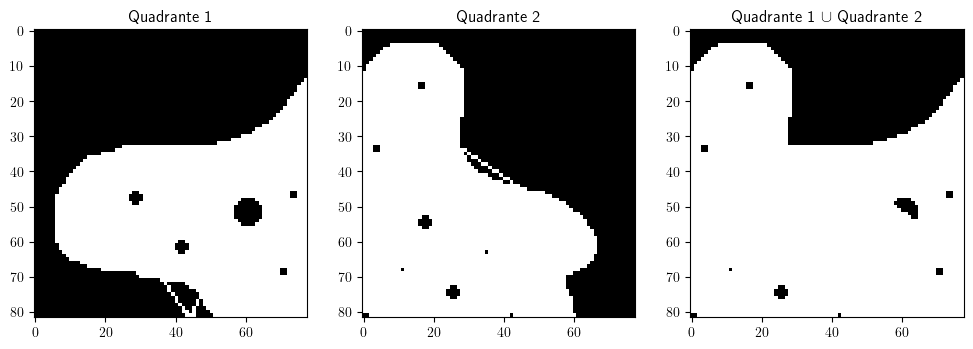

In [183]:
uniao_quadrantes_1_e_2 = quadrante_1 | quadrante_2

plt.rcParams['text.usetex'] = True # Ativando o LaTeX para o Matplotlib
_, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(quadrante_1, cmap='gray')
ax[0].set_title('Quadrante 1')
ax[1].imshow(quadrante_2, cmap='gray')
ax[1].set_title('Quadrante 2')
ax[2].imshow(uniao_quadrantes_1_e_2, cmap='gray')
ax[2].set_title(r'Quadrante 1 $\cup$ Quadrante 2')
plt.show()

#### Intersecção

A intersecção entre dois conjuntos, $A$ e $B$, é dada por:

$$A \cap B = \{c|c\in A \text{ e } c \in B\}.$$

Vamos aplicar a intersecção entre o primeiro e o segundo quadrante:

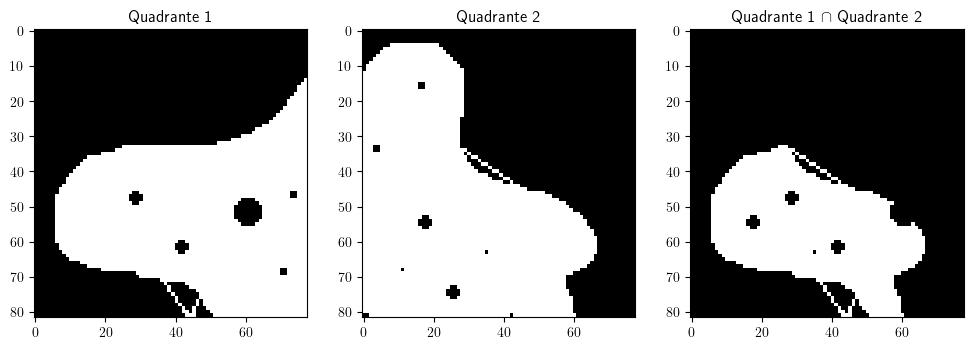

In [184]:
interseccao_quadrantes_1_e_2 = quadrante_1 & quadrante_2

_, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(quadrante_1, cmap='gray')
ax[0].set_title('Quadrante 1')
ax[1].imshow(quadrante_2, cmap='gray')
ax[1].set_title('Quadrante 2')
ax[2].imshow(interseccao_quadrantes_1_e_2, cmap='gray')
ax[2].set_title(r'Quadrante 1 $\cap$ Quadrante 2')
plt.show()

#### Complemento

O *complemento* de uma imagem $A$ é:

$$A^C = \{c|c \notin A\}.$$

Fazendo o complemento do primeiro quadrante:

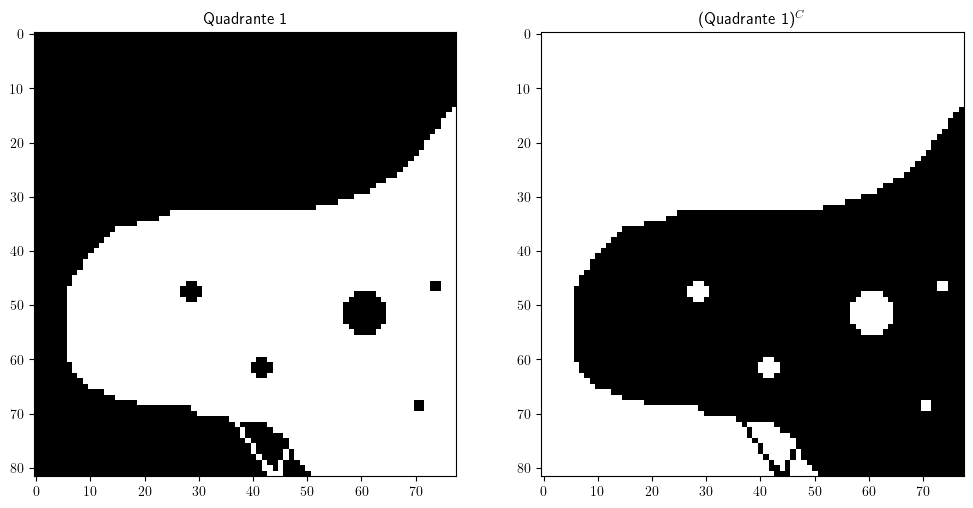

In [185]:
quadrante_1_c = ~quadrante_1

_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(quadrante_1, cmap='gray')
ax[0].set_title('Quadrante 1')
ax[1].imshow(quadrante_1_c, cmap='gray')
ax[1].set_title(r'(Quadrante 1)$^C$')
plt.show()

#### Diferença

A diferença entre dois conjuntos, $A$ e $B$, é dada por:

$$A - B = \{c|c\in (A \cap B^C)\}.$$

E equivale a remover da imagem $A$ os *pixels* da imagem $B$.

Vamos aplicar a diferença entre o primeiro e o segundo quadrante:

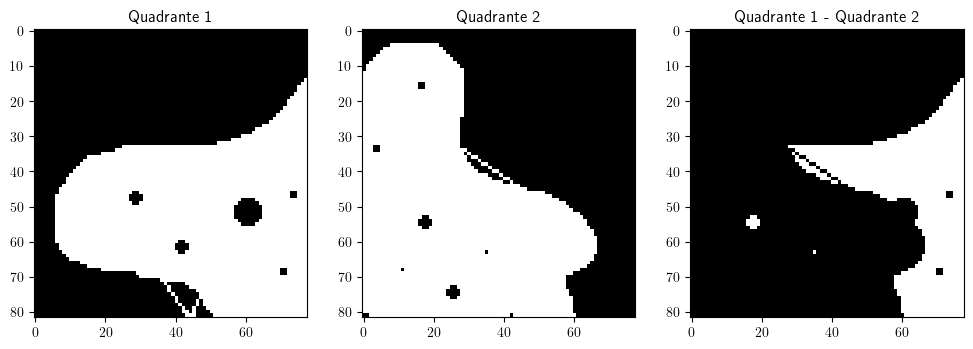

In [186]:
diff = lambda A, B : A & ~B
diferenca_quadrantes_1_e_2 = diff(quadrante_1, quadrante_2)

_, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(quadrante_1, cmap='gray')
ax[0].set_title('Quadrante 1')
ax[0].set_box_aspect()
ax[1].imshow(quadrante_2, cmap='gray')
ax[1].set_title('Quadrante 2')
ax[1].set_box_aspect()
ax[2].imshow(diferenca_quadrantes_1_e_2, cmap='gray')
ax[2].set_title('Quadrante 1 - Quadrante 2')
ax[2].set_box_aspect()
plt.show()

#### Translação

A *translação* de uma imagem $A$ por um ponto $p = (x,y)$ é dada por:

$$A + p = \{a + p\ |\ a\in A\}.$$

Para implementar essa operação, teremos que considerar também quando os pontos do objeto saem das dimensões da imagem. Portanto, vamos criar uma função de translação.

In [187]:
def transladar(img, x, y):
    linhas, colunas = img.shape

    translated_rows = slice(max(0, y), min(linhas, linhas + y))
    translated_cols = slice(max(0, x), min(colunas, colunas + x))

    imagem_transladada = np.zeros_like(img)
    imagem_transladada[translated_rows, translated_cols] = \
        img[max(0, -y):min(linhas, linhas - y), 
            max(0, -x):min(colunas, colunas - x)]

    return imagem_transladada

Vamos transladar o quadrante 3:

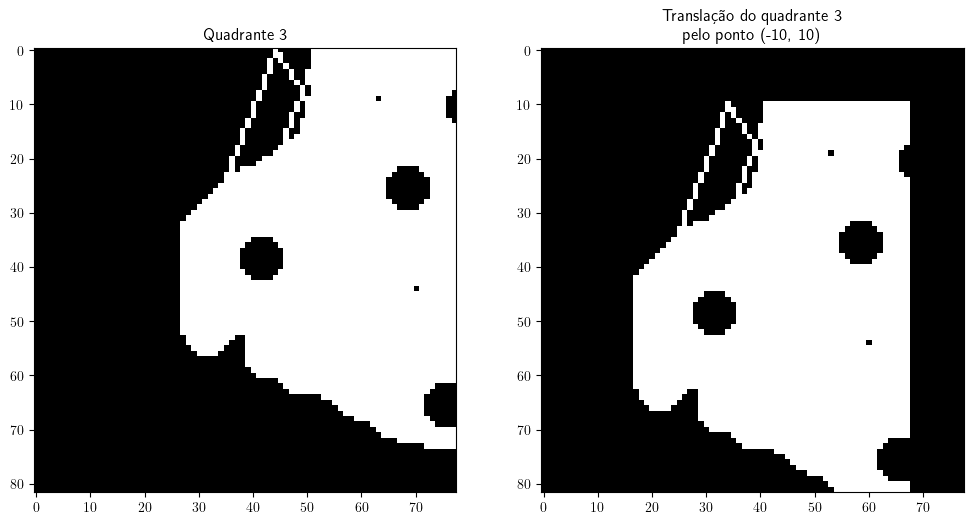

In [188]:
ponto = (-10, 10)
imagem_transladada = transladar(quadrante_3, *ponto)

_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(quadrante_3, cmap='gray')
ax[0].set_title('Quadrante 3')
ax[1].imshow(imagem_transladada, cmap='gray')
ax[1].set_title(f'Translação do quadrante 3\npelo ponto {ponto}')
plt.show()

#### Elementos estruturantes

Agora, para começar a definir as *operações morfológicas*, precisamos combinar nosso conhecimento de operações em imagens como conjuntos com um novo elemento, denominado **elemento estruturante**.

O elemento estruturante nada mais é que uma imagem binária de dimensões pequenas com aspectos, muitas vezes, simétricos. Vamos implementar e visualizar alguns exemplos:

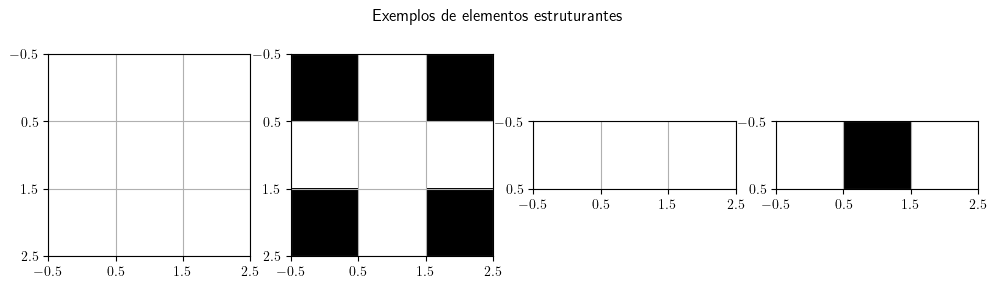

In [189]:
es1 = np.ones((3,3), dtype=bool)

es2 = np.zeros((3,3), dtype=bool)
es2[:,1] = True
es2[1,:] = True

es3 = np.ones((1,3), dtype=bool)

es4 = np.ones((1,3), dtype=bool)
es4[0,1] = False

fig, ax = plt.subplots(1, 4, figsize=(12, 3))
fig.suptitle('Exemplos de elementos estruturantes')
ax[0].imshow(es1, cmap='Greys')
ax[0].xaxis.set_ticks([-.5,.5,1.5,2.5])
ax[0].yaxis.set_ticks([-.5,.5,1.5,2.5])
ax[0].grid()
ax[1].imshow(es2, cmap='gray')
ax[1].xaxis.set_ticks([-.5,.5,1.5,2.5])
ax[1].yaxis.set_ticks([-.5,.5,1.5,2.5])
ax[1].grid()
ax[2].imshow(es3, cmap='Greys')
ax[2].xaxis.set_ticks([-.5,.5,1.5,2.5])
ax[2].yaxis.set_ticks([-.5,.5])
ax[2].grid()
ax[3].imshow(es4, cmap='gray')
ax[3].xaxis.set_ticks([-.5,.5,1.5,2.5])
ax[3].yaxis.set_ticks([-.5,.5])
ax[3].grid()
plt.show()

### Álgebra de Minkowski

Certas combinações sucessivas de operações de conjuntos entre a imagem e este elemento estruturante definem um *operador morfológico*. Para definir as operações morfológicas, são necessárias as operações auxiliares definidas na *Álgebra de Minkowski*, em homenagem ao matemático Hermann Minkowski.

A seguir, vamos ver e implementar algumas operações básicas da Álgebra de Minkowski.

Mas, antes de implementá-las vamos precisar de uma função auxiliar para nos retornar os índices dos elementos estruturantes:

In [190]:
def indices_es(es):
    indices = []
    centro_x, centro_y = es.shape[0] // 2, es.shape[1] // 2

    for i in range(es.shape[0]):
        for j in range(es.shape[1]):
            if es[i, j]:
                x, y = i - centro_x, j - centro_y
                indices.append((x, y))

    return indices

print(f'Índices do elemento estruturante 1: {indices_es(es1)}')
print(f'Índices do elemento estruturante 2: {indices_es(es2)}')
print(f'Índices do elemento estruturante 3: {indices_es(es3)}')
print(f'Índices do elemento estruturante 4: {indices_es(es4)}')

Índices do elemento estruturante 1: [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]
Índices do elemento estruturante 2: [(-1, 0), (0, -1), (0, 0), (0, 1), (1, 0)]
Índices do elemento estruturante 3: [(0, -1), (0, 0), (0, 1)]
Índices do elemento estruturante 4: [(0, -1), (0, 1)]


#### Adição de Minkowski

Considerando uma imagem binária $A$ e um elemento estruturante binário $B$, a *adição de Minkowski*, denotada por $A \oplus B$, é dada por:

$$ A \oplus B = \bigcup_{b \in B} (A + b). $$

Vamos implementá-la:

In [191]:
def adicao_de_minkowski(img, es):
    res = np.zeros(img.shape, dtype=bool)

    for point in indices_es(es):
        res = res | transladar(img, *point)
    
    return res

Agora, vamos testá-la usando o elemento estruturante 1:

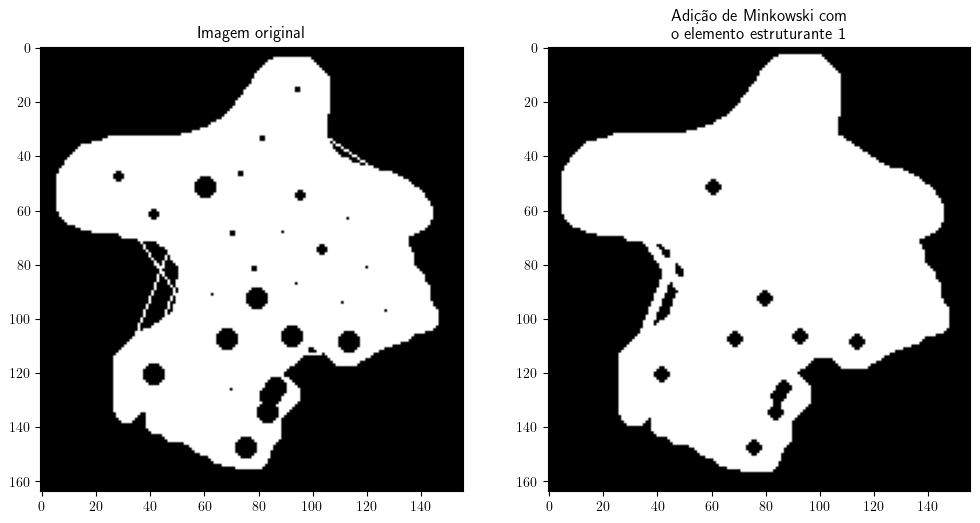

In [192]:
res = adicao_de_minkowski(img_bin, es1)

_, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(img_bin, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(res, cmap='gray')
ax[1].set_title('Adição de Minkowski com\no elemento estruturante 1')
plt.show()

#### Subtração de Minkowski

Considerando uma imagem binária $A$ e um elemento estruturante binário $B$, a *subtração de Minkowski*, denotada por $A \ominus B$, é dada por:

$$ A \ominus B = \bigcap_{b \in B} (A - b). $$

Vamos implementá-la:

In [193]:
def subtracao_de_minkowski(img, es):
    res = img.copy()

    negative_points = [tuple(-1 * v for v in p) for p in indices_es(es)]
    for point in negative_points:
        res = res & transladar(img, *point)

    return res

Agora, vamos testá-la usando o elemento estruturante 1:

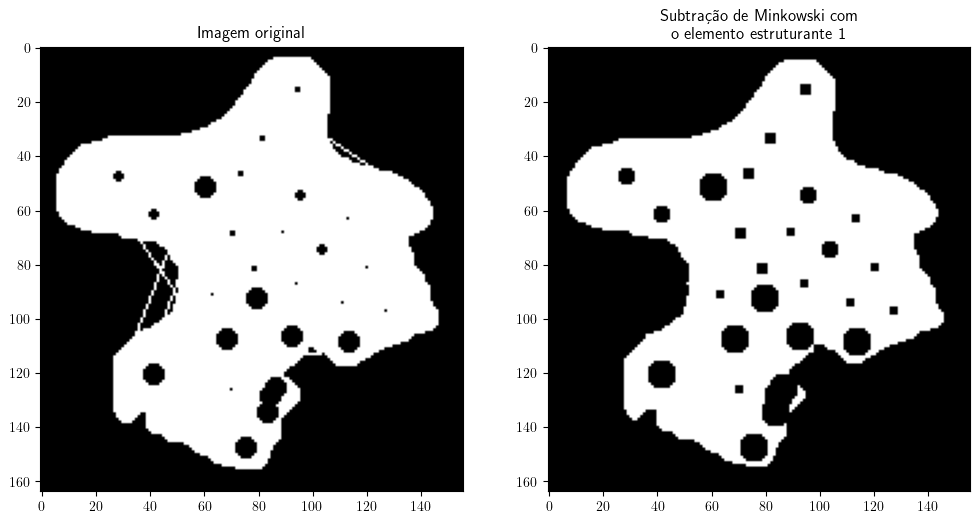

In [194]:
res = subtracao_de_minkowski(img_bin, es1)

_, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(img_bin, cmap='gray')
ax[0].set_title('Imagem original')
ax[1].imshow(res, cmap='gray')
ax[1].set_title('Subtração de Minkowski com\no elemento estruturante 1')
plt.show()

### Operações Morfológicas

Com essas duas operações da Álgebra de Minkoski, já podemos começar a definir operações morfológicas, que nos ajudarão a manipular as formas de nossas imagens.

Vamos introduzir uma nova imagem nos nossos experimentos:

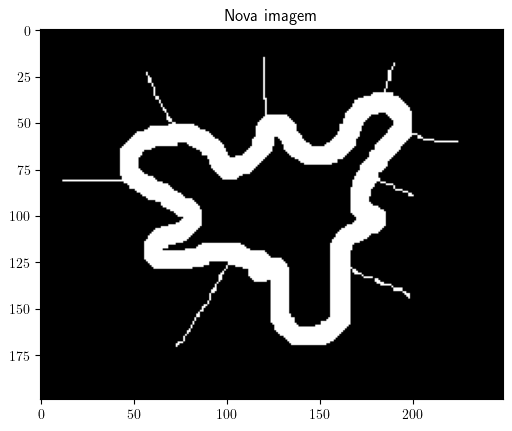

In [195]:
img = mpimg.imread('images/img2.jpg') # Tem shape (164, 156, 3), (Linhas, Colunas, RGB)
img = np.mean(img, axis=2) # Tira a média dos 3 valores dos canais de cores, agora tem shape (164, 156)
img2 = img < 128

plt.imshow(img2, cmap='gray')
plt.title('Nova imagem')
plt.show()

#### Dilatação

A dilatação, nada mais é do que uma adição de Minkowski.

Vejamos sua aplicação na nova imagem:

####

---

### Autores

- Gabriel Furtado Lins Melo

- PhD, Thelmo Pontes de Araujo

### Referências

[1] MELO, G. F. L. **Segmentação Não Supervisionada De Tecido Adiposo Subcutâneo Em Imagens De Tomografia Computadorizada Utilizando Morfologia Matemática E Transformadas De Distância**. 48 f. — Universidade Estadual Do Ceará, Centro De Ciências E Tecnologia Curso De Graduação Em Ciência Da Computação, Fortaleza – Ceará, 2022.

[2] PEDRINI, Hélio; SCHWARTZ, William Robson. **Morfologia Matemática**. *In*: Análise deImagens Digitais. 1. ed. [S. l.]: Cengage Learning, 2007. cap. 9, p. 327-359.